# Social and Economic Networks | problem set 1

## Problems from Barabasi (Ch 2)

### Matrix formalism

Let A be the $NxN$ adjacency matrix of an undirected unweighted network, without self-loops. Let $\mathbb{1}$ be a column vector of N elements, all equal to 1. In other words $\mathbb{1} = (1, 1, ..., 1)^T$ , where the superscript T indicates the transpose operation.

* We can obtain the vector $k$ whose elements are the degrees $k_i$ of all nodes $i = 1, 2,..., N$ by multiplying the matrix A by $\mathbb{1}$ as follows: $k = A\mathbb{1}$.
* The total number of links in the network can be obtained by pre-multiplying the column vector k by the transpose of the column vector $\mathbb{1}$ and dividing it by 2 (since each link will be counted twice otherwise): $L = \frac{1}{2}\mathbb{1}k$.
* The number of triangles T can be obtain by performing $A^3$, which gives us a matrix in which each cell $a_{ij}$ gives us the number of 3-edge paths from $i$ to $j$, and taking the $trace(A^3)$, since all the diagonal elements of $A^3$ give us the number of 3-edges paths from $i$ to $i$, in other words triangles.
* The vector $k_nn$ whose element $i$ is the sum of the degrees of node $i$'s neighbors can be obtained by multiplying the adjacency matrix A by itself and then by $\mathbb{1}$. So $k_nn = A^2\mathbb{1}$.
* The vector $k_nn$ whose element $i$ is the sum of the degrees of node $i$'s neighbors can be obtained by multiplying the adjacency matrix A by itself twice and then by $\mathbb{1}$. So $k_nn = A^3\mathbb{1}$.

### Bipartite networks

We consider the bipartite network in image 2.21.

First, we build its adjacency matrix. It is block-diagonal because it is a square matrix composed of two blocks aligned diagonally (which are symmetric).

In [1]:
from IPython.display import HTML, display

data = [[0,1,2,3,4,5,6,7,8,9,10,11],[1,0,0,0,0,0,0,1,0,0,0,0],[2,0,0,0,0,0,0,0,0,1,0,0],[3,0,0,0,0,0,0,1,1,1,0,0],
       [4,0,0,0,0,0,0,0,0,1,1,0],[5,0,0,0,0,0,0,0,0,1,0,1],[6,0,0,0,0,0,0,0,0,0,0,1],[7,1,0,1,0,0,0,0,0,0,0,0],
       [8,0,0,1,0,0,0,0,0,0,0,0],[9,0,1,1,1,1,0,0,0,0,0,0],[10,0,0,0,1,0,0,0,0,0,0,0],[11,0,0,0,0,1,1,0,0,0,0,0]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

0,1,2,3,4,5,6,7,8,9,10,11
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,1,1,0,0
4,0,0,0,0,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,1
7,1,0,1,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0
9,0,1,1,1,1,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0


We now construct the adjacency matrix of its two projections:

In [2]:

data = [[0,1,2,3,4,5,6],[1,0,0,1,0,0,0],[2,0,0,1,1,1,0],[3,1,1,0,1,1,0],[4,0,1,1,0,1,0],[5,0,1,1,1,0,1],[6,0,0,0,0,1,0]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

data = [[0,7,8,9,10,11],[7,0,1,1,0,0],[8,1,0,1,0,0],[9,1,1,0,1,1],[10,0,0,1,0,0],[11,0,0,1,0,0]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

0,1,2,3,4,5,6
1,0,0,1,0,0,0
2,0,0,1,1,1,0
3,1,1,0,1,1,0
4,0,1,1,0,1,0
5,0,1,1,1,0,1
6,0,0,0,0,1,0


0,7,8,9,10,11
7,0,1,1,0,0
8,1,0,1,0,0
9,1,1,0,1,1
10,0,0,1,0,0
11,0,0,1,0,0


In the bipartite network, the average degree for the purple nodes is $\frac{10}{6}$, and for the green nodes is $\frac{10}{5}$.

In each projection, however, the average degree for purple nodes is $\frac{16}{6}$, and for green nodes is $\frac{10}{5}$. The answer is different from the first because node 9 is connected to many purple nodes, so it makes sense that purple nodes have a higher average degree.

### Bipartite graph - general considerations

We consider a bipartite network with $N_1$ and $N_2$ nodes in the two sets.

* The maximum number of links in a bipartite network is $L_{max} = N_1.N_2$.
* Compared to a non-bipartite graph of size $N = N_1 + N_2$, where $L_{max}=N!$, the number of links that cannot occur is of $N! - N_1.N_2$
* 
* We can express the average degree in each part of the bipartite network as follows:
$$<k_1> = \frac{L}{N_1}$$
$$<k_2> = \frac{L}{N_2}$$

## Problem from Easley and Kleinberg: Problem 6, Chapter 14

#### a)
Concept: The Hub-Authority algorithm is a network structure that models two types of nodes: directories (hubs) and "expert" sites (authorities). Each page has 2 scores: 1) the total sum of votes of authorites pointed to hub; and, 2) the total sum of votes coming from authorities.

The 2-step hub-authority is computed by the following algorithm: 
* Step 1: Initialize by scoring every hub going to an authority with equal weight 
* Step 2: Apply Authority Update Rule: sum all of the Hub scores of pages that point to the authority
* Step 3: Apply Hub Update Rule: update the hub score by summing all of the authority scores of all its linking pages
* Step 4: Normalize

To compute the 2-step hub-authority for the provided network in problem 6, we find each node has the following values:
A1 = .33,  A2 = .33, A3 = .33, B1 = .33, B2 = .33, B3 = .33, C1 = .20, C2 = .20, C3 = .20, C4 = .20, C5 = .20, D = 1

#### b)
A k-step application of the Hub-Authority algorithm is when the Authority Update Rule is applied k times and then the Hub Update Rule.

* $\forall$ p, we update auth(p) to be the sum of:
auth(p) = $\sum_{i = 1}^n$ hub(i), k= 2
    * auth(B1) = $\sum_{i = 1}^{12}$ hub(1)=   
    * auth(B2) = $\sum_{i = 2}^{12}$ hub(2)=
    * auth(B3) = $\sum_{i = 3}^{12}$ hub(3)=  
    * auth(D)  = $\sum_{i = 4}^{12}$ hub(4)= 
* $\forall$ p, we update hub(p) to be the sum of:
hub(i) = $\sum_{i = 1}^{12}$ auth(i)
    * hub(A1)
    * hub(A2)
    * hub(A3)
    * hub(C1)
    * hub(C2)
    * hub(C3)
    * hub(C4)
    * hub(C5)
    

#### c) 
As k goes to infinity the normalized values at each node will converge to a stable set of values and will remain fixed at the point of convergence. Because the hub and authority scores are proportional to each other, independent of what initial values with which you begin (provided they are positive), the approximate scores will reach an equilibrium (i.e. limit) over time. The Hub Authority ranking procedure provides an information retrieval system that takes into consideration both quality (weights based on endorsements) and quantity (weights based on the number of sites each hub/authority is pointing to and from). Thus, these scores are purely dependent on the link structure and as such sites can be powerful endorsers without themeslves being heavily endorsed. Said differently, a "good" hub would be a page that points to many "good" authorities and a "good" authority is referenced by many hubs. 

## Problem 1


### a) 
We label the nodes of the graph as follows:

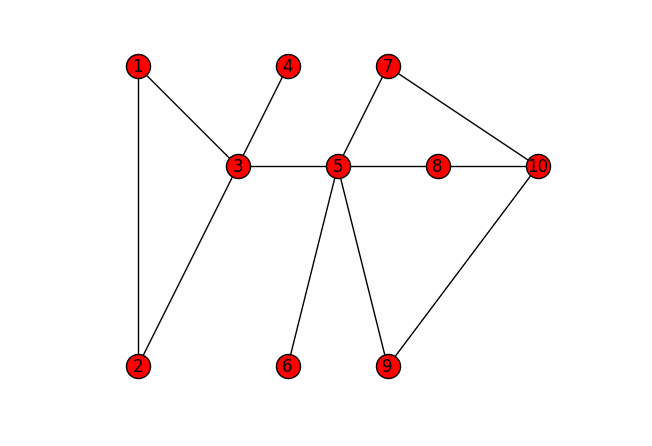

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_nodes_from(range(1,10))

G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(3,5),(5,6),(5,7),(5,8),(5,9),(8,10),(9,10),(7,10)])

pos_dict = {1:(1,4), 2:(1,1), 3:(2,3), 4:(2.5,4), 5:(3,3), 6:(2.5,1), 7:(3.5,4), 8:(4,3), 9:(3.5,1), 10:(5,3)}

nx.draw(G, pos = pos_dict)
nx.draw_networkx_labels(G, pos = pos_dict)
plt.show()       

We then plot the degree distribution in the following bar chart:

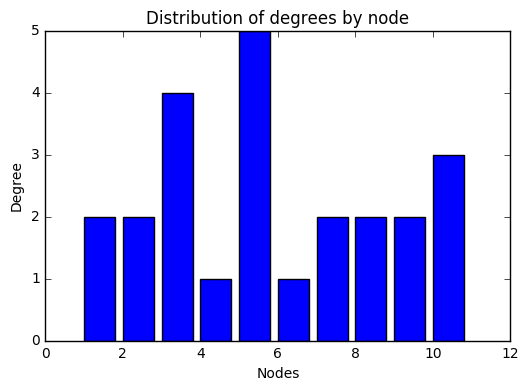

In [5]:
x = G.nodes()
y = [len(G.neighbors(x)) for x in G.nodes()]

plt.bar(x, y)
plt.title("Distribution of degrees by node")
plt.xlabel("Nodes")
plt.ylabel("Degree")
plt.show()

### b)
To find the clustering coefficient CC(v) of each node, we first compute its neighbor K(v) (the degree  of the node) and the number of links between its neighbors N(v). We then compute CC(v) through the following formula $\frac{2N(v)}{K(v)(K(v)-1)}$. Thus, 
* CC(1) = $\frac{2(1)}{2(2-1)}$ = 1 
* CC(2) = $\frac{2(1)}{2(2-1)}$ = 1
* CC(3) = $\frac{2(1)}{4(4-1)}$ = 1/6
* CC(4) = $\frac{2(0)}{1(1-1)}$ = 0
* CC(5) = $\frac{2(0)}{5(5-1)}$ = 0
* CC(6) = $\frac{2(0)}{1(1-1)}$ = 0
* CC(7) = $\frac{2(0)}{2(2-1)}$ = 0
* CC(8) = $\frac{2(0)}{2(2-1)}$ = 0 
* CC(9) = $\frac{2(0)}{2(2-1)}$ = 0
* CC(10) = $\frac{2(1)}{3(3-1)}$ = 1/3 

The average cluster = C$\frac{1}{n}\sum_{i = 1}^nC_i = \frac{1}{4}$



### c)
The distance from u to v, d(u,v), is the length of the shortest path from u to v in G. The average distance can be found by finding the shortest path between all pairs of nodes, adding them and then dividing by the total number of pairs:
* d(1,2)= 1, d(1,3)= 1, d(1,4)= 2, d(1,5)= 2, d(1,6)= 3, d(1,7)= 3, d(1,8)= 3, d(1,9)= 3, d(1,10)= 4
* d(2,3)= 1, d(2,4)= 2, d(2,5)= 2, d(2,6)= 3, d(2,7)= 3, d(2,8)= 3, d(2,9)= 3, d(2,10)= 4
* d(3,4)= 1, d(3,5)= 1, d(3,6)= 2, d(3,7)= 2, d(3,8)= 2, d(3,9)= 2, d(3,10)= 3
* d(4,5)= 2, d(4,6)= 3, d(4,7)= 3, d(4,8)= 3, d(4,9)= 3, d(4,10)= 4
* d(5,6)= 1, d(5,7)= 1, d(5,8)= 1, d(5,9)= 1, d(5,10)= 2
* d(6,7)= 2, d(6,8)= 2, d(6,9)= 2, d(6,10)= 3
* d(7,8)= 2, d(7,9)= 2, d(7,10)= 1
* d(8,9)= 2, d(8,10)= 1
* d(9,10)= 1


Given the pair, the total average distance = (22 + 21 + 13 + 18 + 6 + 9 + 5 + 3 + 1)/45 = 98/45 = 2.17

The diameter of a network can be found by finding the longest path of all the shortest paths. To begin, we first find the eccentricity of a vertex v $\in V(G)$, which can be defined as e(v) = max{d, u, v} | v $\in V(G)$.
* e(v_1) = 4
* e(v_2) = 4
* e(v_3) = 3
* e(v_4) = 4
* e(v_5) = 2
* e(v_6) = 3
* e(v_7) = 3
* e(v_8) = 3
* e(v_9) = 3
* e(v_10) = 4
Then, the diameter dim(G) = max {e(v) | v $\in V(G)$} = 4


## Problem 2

### (a) Star networks

(a.1) Plot the degree distribution of the network

In a star network with n spokes, the distribution of degrees will be such that there will be $n$ nodes with degree 1, and 1 node with degree n. 

We illustrate this by plotting the degree distribution of a star network with 4 spokes:

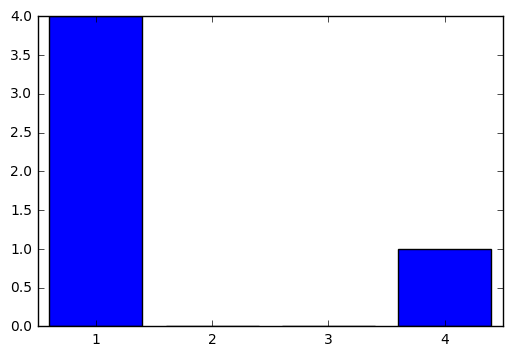

In [6]:
import matplotlib.pyplot as plt


D = {1:4, 2:0, 3:0, 4:1}

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())

plt.show()

And the degree distribution of a star network with 10 spokes:

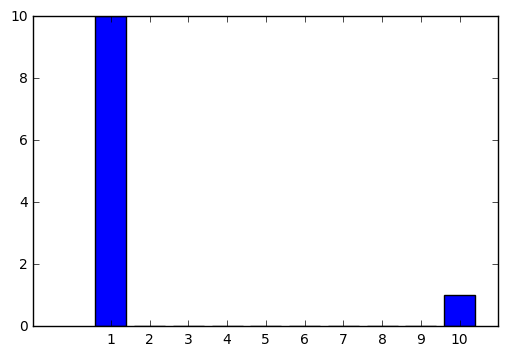

In [7]:
D = {1:10, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:1}

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())

plt.show()

(a.2) The average distance is the sum of the distance between all pairs of points divided by the number of pairs of points. So, given a distance $d_ij$ between a pair of points $i$ and $j$, we can write the average distance as $\frac{\sum_{i=1}^N\sum_{j=1}^Nd_ij}{2N!}$.

The diameter of a network is its maximum shortest path, so in the case of a start network, the diameter is 2.

(a.3) There are $N-1$ ways to go from hub to hub (by leaving the hub, reaching one of the spokes, and returning to the hub).
There is only one way to go from the hub to each of the respective spokes.

### (b) Regular networks

(b.1) We plot 3 different regular networks with n = 9 and k = 2. However, although the ordering of the nodes is different in each case, each of these networks can also be represented as a circle (or in the second case, as two circles).

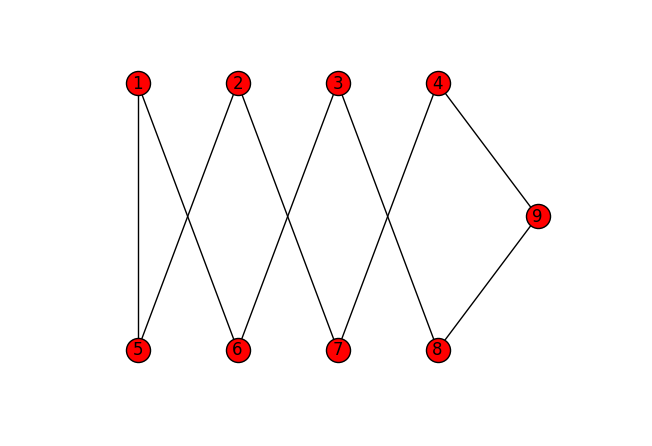

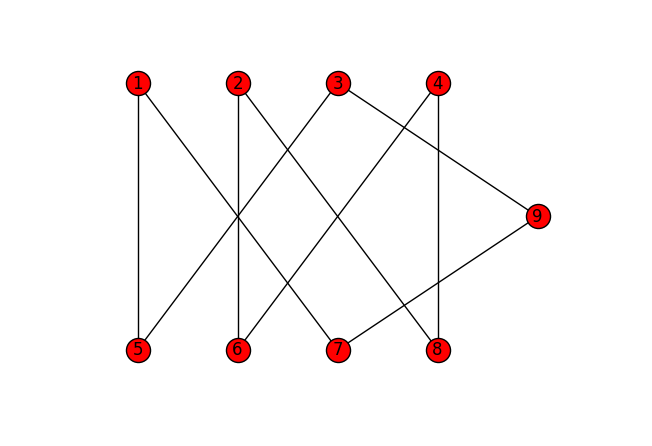

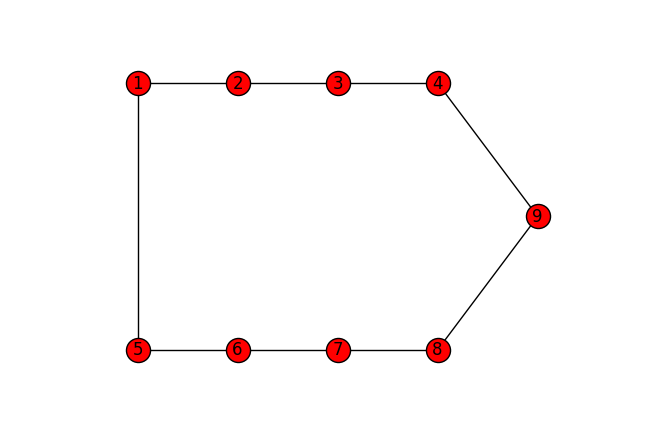

In [8]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(range(1,9))

G.add_edges_from([(1,5),(1,6),(2,5),(2,7),(3,6),(3,8),(4,7),(4,9),(8,9)])

pos_dict = {1:(1,4), 2:(2,4), 3:(3,4), 4:(4,4), 5:(1,2), 6:(2,2), 7:(3,2), 8:(4,2), 9:(5,3)}


nx.draw(G, pos = pos_dict)
nx.draw_networkx_labels(G, pos = pos_dict)
plt.show()

G = nx.Graph()

G.add_nodes_from(range(1,9))

G.add_edges_from([(1,5),(1,7),(2,6),(2,8),(3,5),(3,9),(4,6),(4,8),(7,9)])

nx.draw(G, pos = pos_dict)
nx.draw_networkx_labels(G, pos = pos_dict)
plt.show()


G = nx.Graph()

G.add_nodes_from(range(1,9))

G.add_edges_from([(1,2),(2,3),(3,4),(4,9),(9,8),(8,7),(7,6),(6,5),(5,1)])

nx.draw(G, pos = pos_dict)
nx.draw_networkx_labels(G, pos = pos_dict)
plt.show()

### (c) Bipartite networks

(c.1) The first network is not bipartite, since we cannot divide its nodes into two disjoint sets. The second graph is bipartite, where we can divide the nodes into two disjoint sets: one set with the nodes in the middle row, and one set including the nodes in the upper and lower rows.

(c.2) Star networks are bipartite since we can divide them into two disjoint sets: one with the hub, and the other with the spokes. Circles are only bipartite if they contain an even number of nodes, in which case each disjoint set will include every other node.

## Problem 3